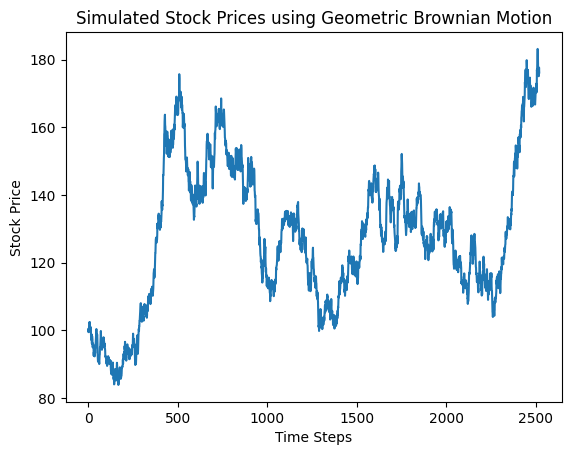

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm(S0, mu, sigma, T, dt):
    """
    Simulate stock prices using Geometric Brownian Motion.
    
    Parameters:
    S0 (float): Initial stock price
    mu (float): Drift rate
    sigma (float): Volatility
    T (float): Total time (e.g., number of years)
    dt (float): Time step (e.g., 1/252 for daily steps)
    
    Returns:
    np.ndarray: Simulated stock prices
    """
    N = int(T / dt)  # Number of time steps
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size=N)  # Standard Brownian motion
    W = np.cumsum(W) * np.sqrt(dt)  # Weiner process
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)
    return S

# Parameters
S0 = 100  # Initial stock price
mu = 0.1  # Drift (10% annual return)
sigma = 0.2  # Volatility (20% annual volatility)
T = 10.0  # Time period (1 year)
dt = 1/252  # Time step (1 trading day)

# Simulate stock prices
simulated_prices = simulate_gbm(S0, mu, sigma, T, dt)

# Plot the simulated stock prices
plt.plot(simulated_prices)
plt.title('Simulated Stock Prices using Geometric Brownian Motion')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()

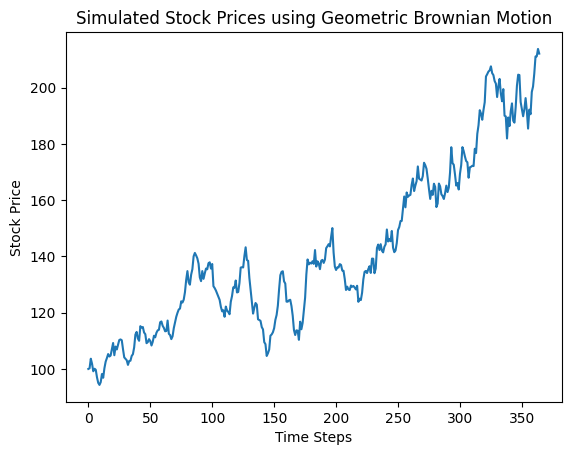

In [225]:
import numpy as np

def gbm_simulator(S0, mu, sigma, T, N):
    # Time step
    dt = T / N
    
    # Initial stock price
    S = S0

    # Generate random increments for Brownian motion
    dW = np.random.normal(0, np.sqrt(dt), N)

    for i in range(N):
        # Yield the current stock price
        yield S
        # Update the stock price
        S *= np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW[i])

# Parameters
S0 = 100  # initial stock price
mu = 0.1  # drift (annual return)
sigma = 0.2  # volatility (annual standard deviation)
T = 5.0  # time horizon in years
N = 365  # number of time steps (e.g., daily steps for one year)

# Create the generator
stock_price_generator = gbm_simulator(S0, mu, sigma, T, N)

simulated_prices = np.array(list(stock_price_generator))
# Plot the simulated stock prices
plt.plot(simulated_prices)
plt.title('Simulated Stock Prices using Geometric Brownian Motion')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.show()